In [2]:
import torch
import torch.nn.functional as F
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import seaborn as sns

repo_root = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(repo_root)

from tqdm import tqdm

from src.utils import MNIST
from src.model import FlexibleMLP

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import random

In [31]:
# ✅ Настройки и параметры
CHECKPOINT_ROOT = f"{repo_root}/data/checkpoints/exp13/"
lr_list = np.logspace(-4, 0, 10)
layer_name = 'model.0.weight'  # Из первого Linear слоя
num_visualized_iters = 10  # Например, с 100 по 109 итерацию
ref_iter = 100

In [32]:
num_tracked_weights = 10

In [ ]:


# ✅ Загрузка весов в память
def load_weights_to_memory(lr_dir, layer_name):
    all_weights = []
    for step_file in sorted(os.listdir(lr_dir)):
        if step_file.endswith(".pt") and step_file.startswith("step_"):
            state_dict = torch.load(os.path.join(lr_dir, step_file), map_location='cpu')
            layer_weights = state_dict[layer_name].flatten().numpy()
            all_weights.append(layer_weights)
    return np.stack(all_weights)  # [steps, weights]

# ✅ Визуализация: Траектории случайных весов (для всех lr одни и те же веса)
random.seed(228)  # Для воспроизводимости

# Сохраняем индексы случайных весов для всех lr
selected_indices = None

# Загружаем веса для всех learning rates заранее в память
weights_per_lr = {}

for lr in lr_list:
    lr_dir = os.path.join(CHECKPOINT_ROOT, f"lr_{lr:.0e}")
    if not os.path.exists(lr_dir):
        continue

    print(f"\nLoading weights for lr={lr:.0e}...")
    all_weights = load_weights_to_memory(lr_dir, layer_name)  # [steps, weights]
    weights_per_lr[lr] = all_weights

    # Для первого lr сохраняем индексы случайных весов
    if selected_indices is None:
        num_total_weights = all_weights.shape[1]
        selected_indices = random.sample(range(num_total_weights), num_tracked_weights)




Loading weights for lr=1e-04...

Loading weights for lr=3e-04...

Loading weights for lr=8e-04...

Loading weights for lr=2e-03...

Loading weights for lr=6e-03...

Loading weights for lr=2e-02...

Loading weights for lr=5e-02...

Loading weights for lr=1e-01...

Loading weights for lr=4e-01...

Loading weights for lr=1e+00...


In [ ]:
def visualise( start_iter, end_iter):
    """
    :param start_iter: начальная итерация
    :param end_iter: конечная итерация
    """
    # ✅ Визуализация: Траектории случайных весов
    for lr in lr_list:
        if lr not in weights_per_lr:
            continue

        all_weights = weights_per_lr[lr]
        plt.figure(figsize=(10, 6))

        # Визуализируем только в пределах выбранного промежутка итераций
        for idx in selected_indices:
            trajectory = all_weights[start_iter:end_iter, idx]
            plt.plot(range(start_iter, end_iter), trajectory, label=f"Weight {idx}", alpha=0.8)

        plt.title(f"Trajectories of Random Weights over Iterations\nLearning rate = {lr:.0e}")
        plt.xlabel("Iteration")
        plt.ylabel("Weight value")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

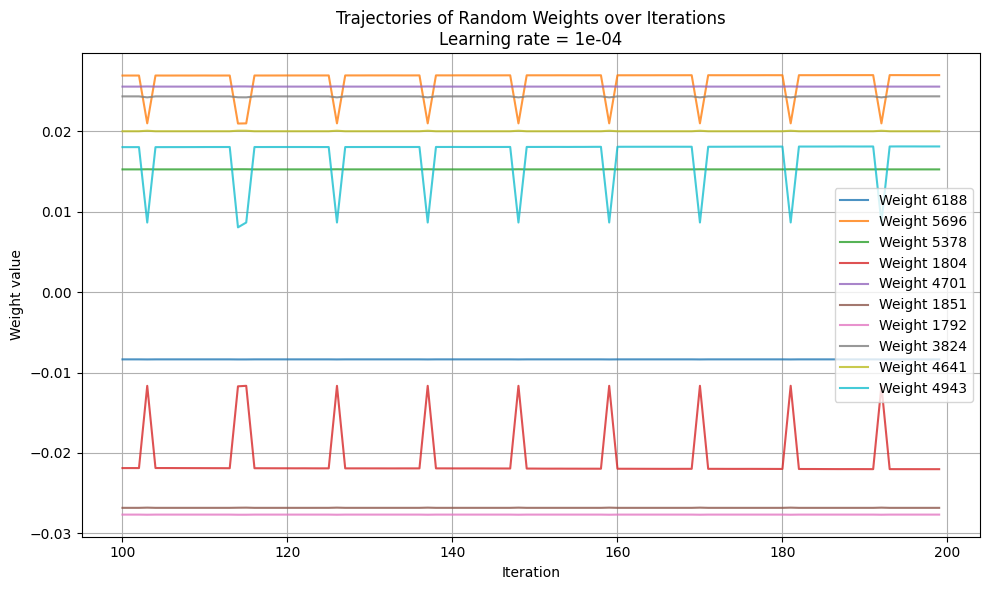

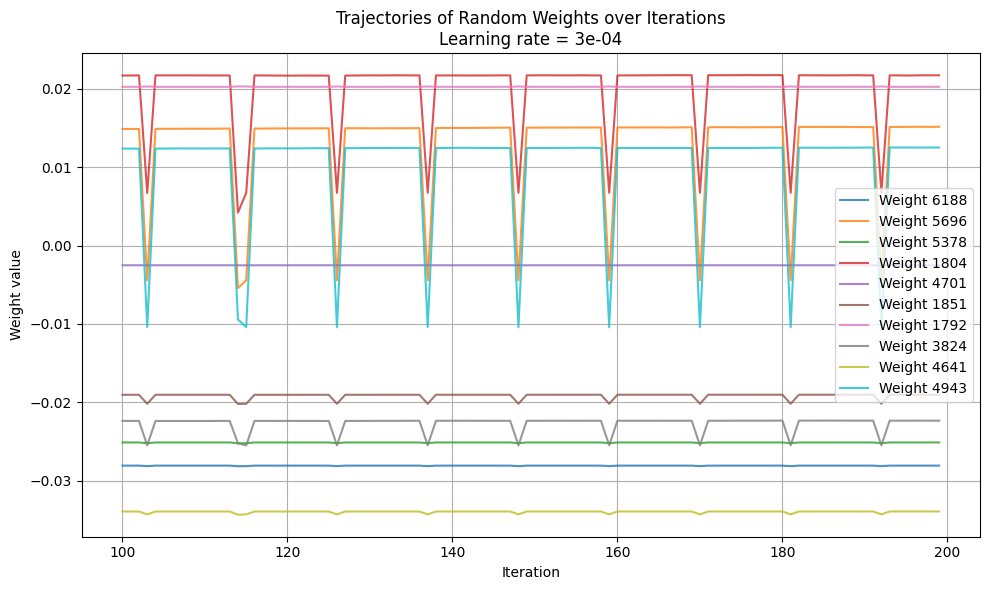

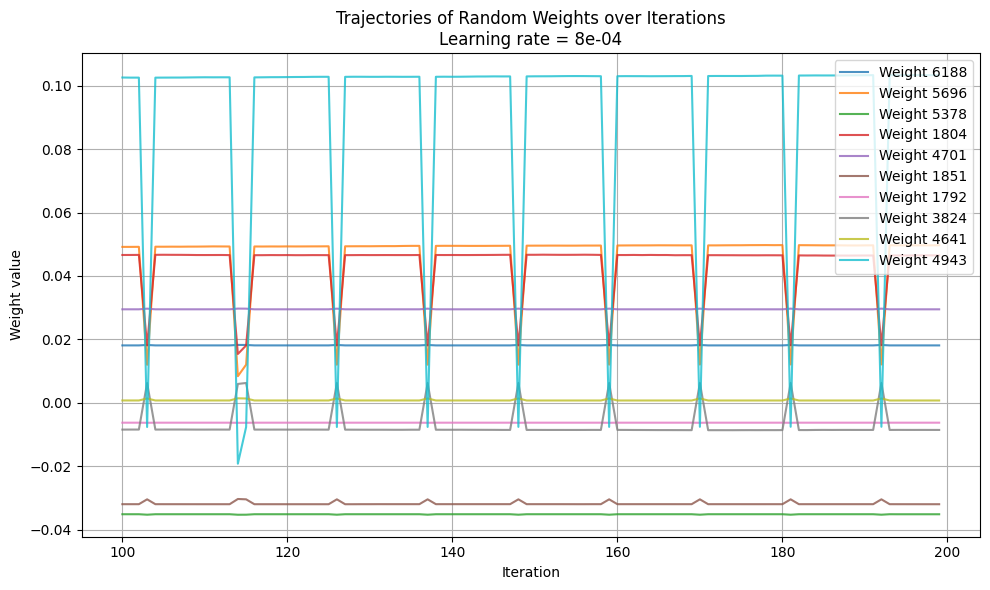

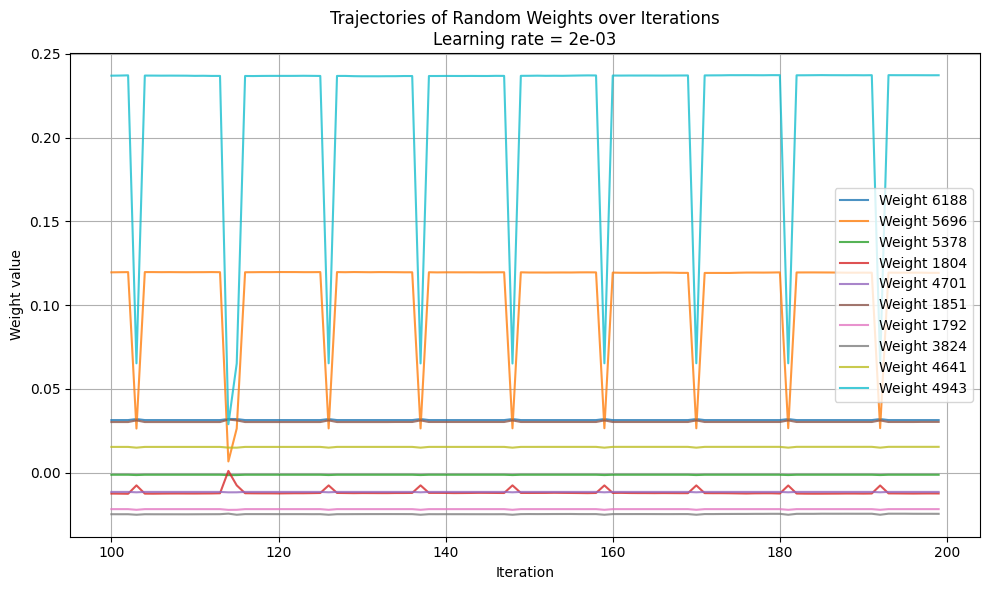

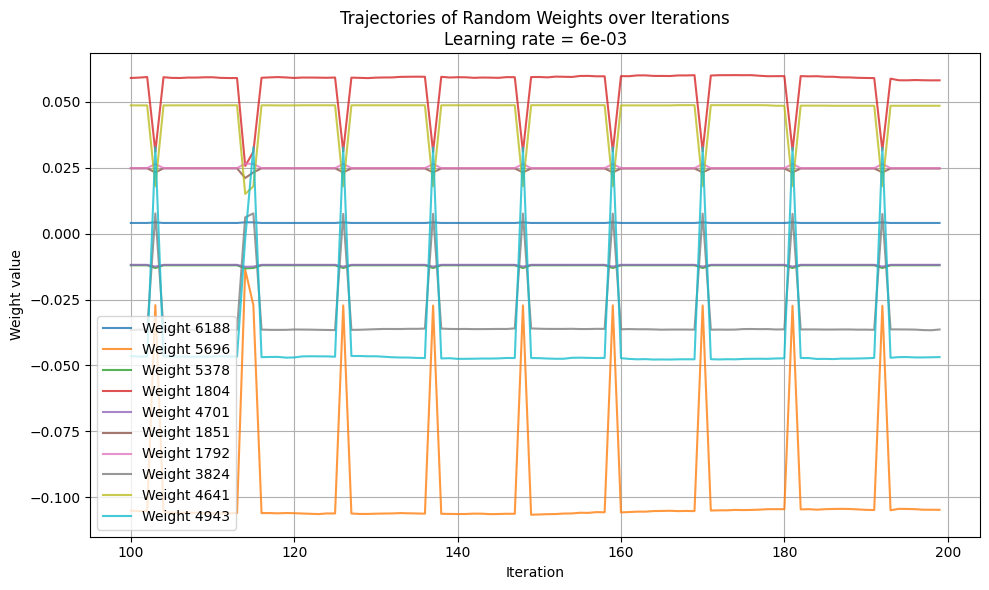

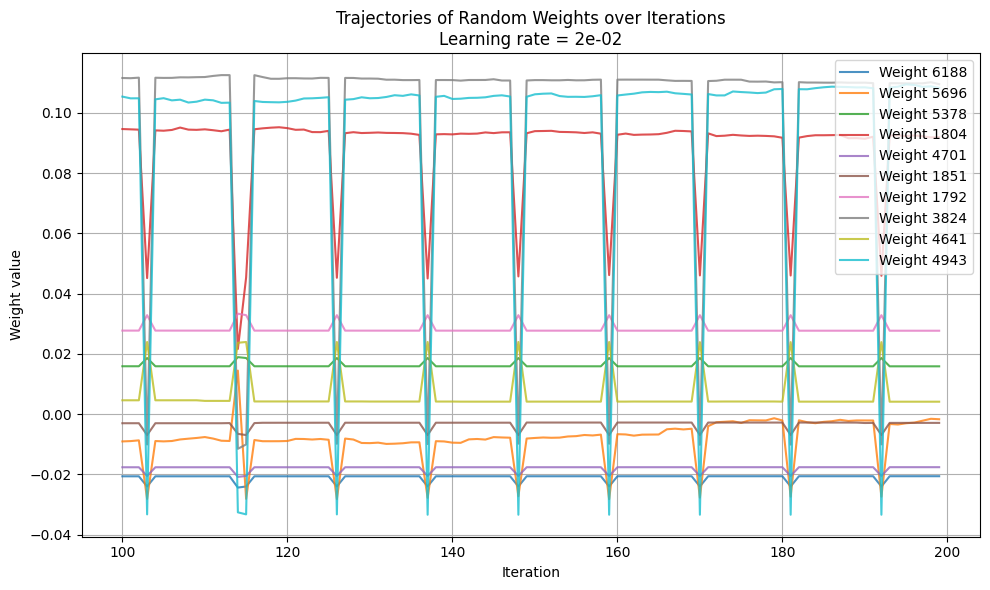

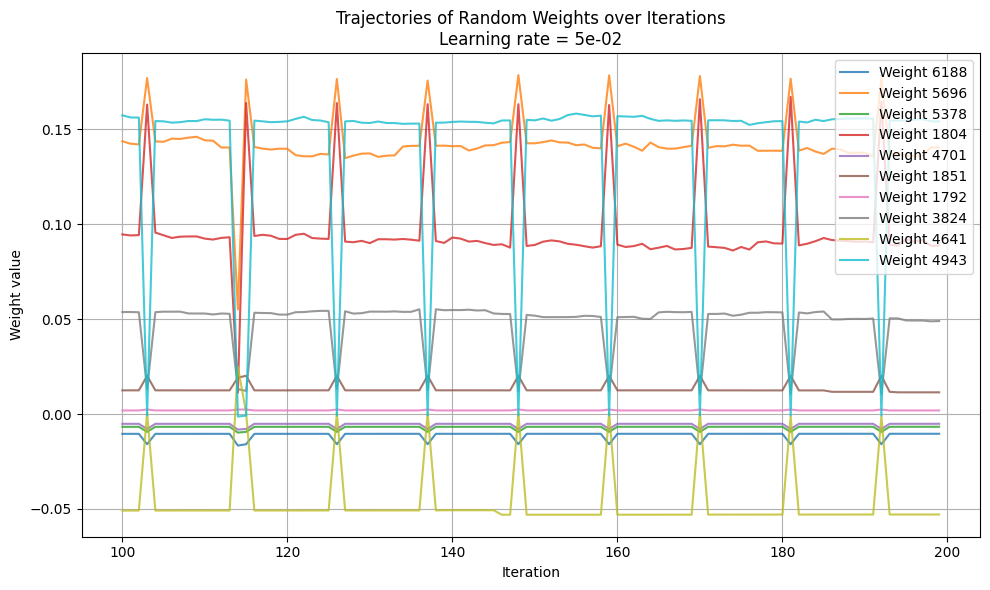

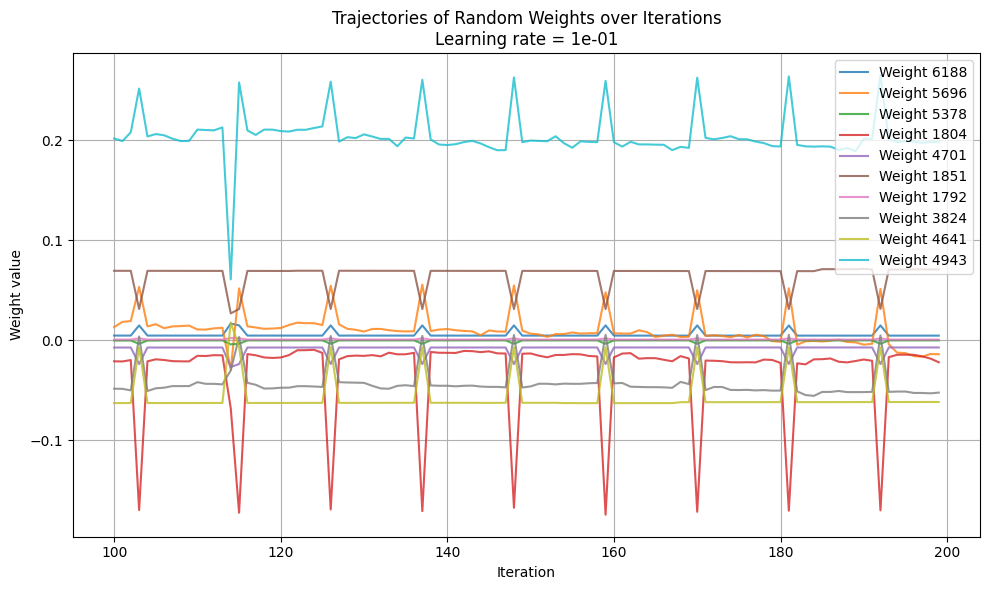

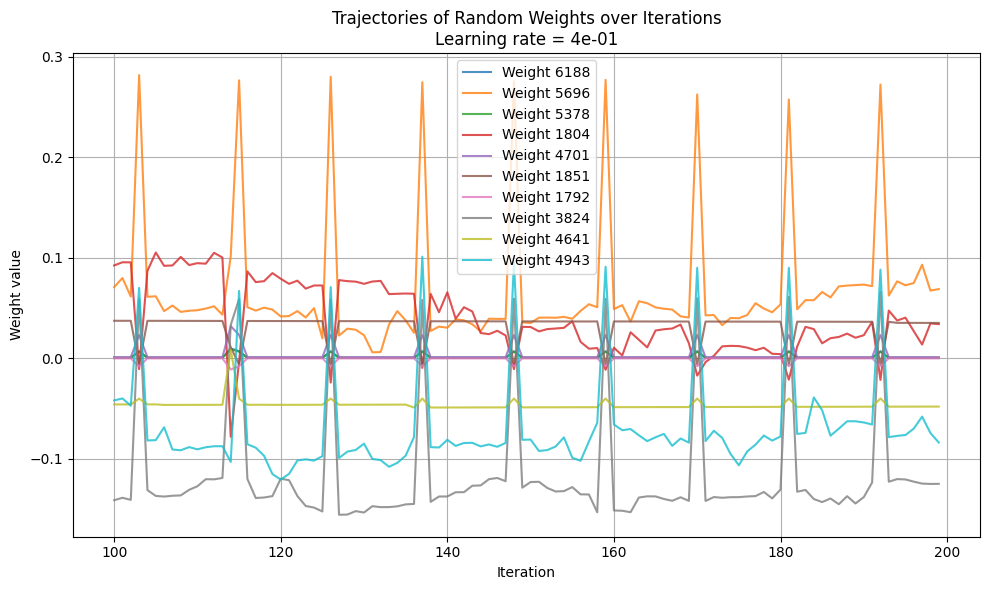

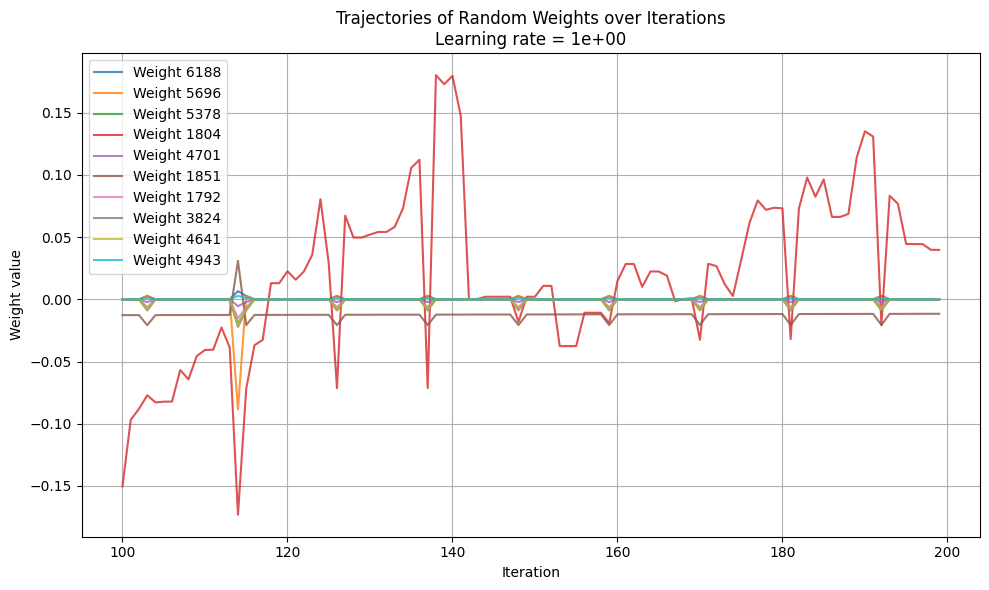

In [38]:
visualise(100, 200)

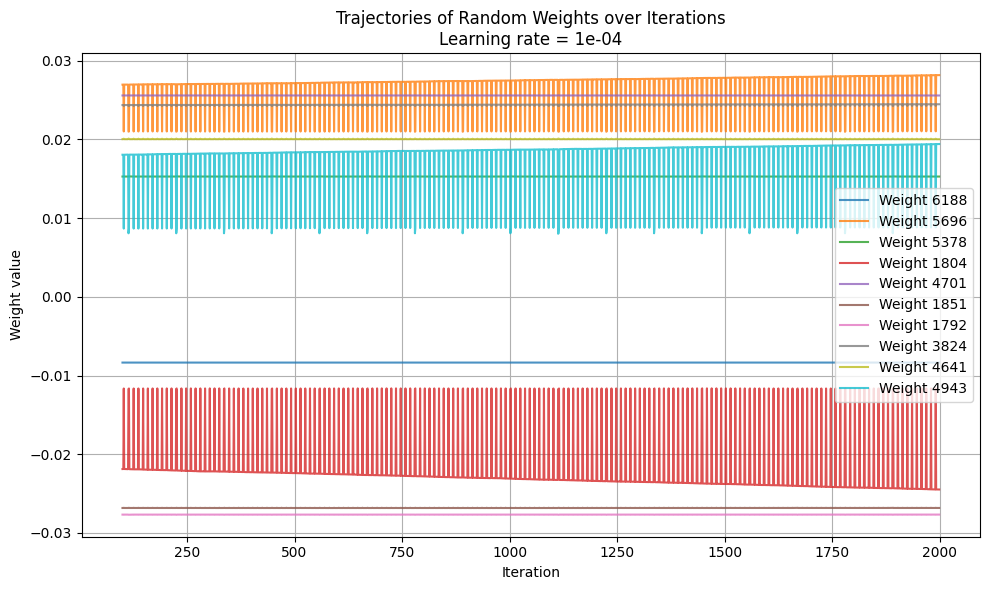

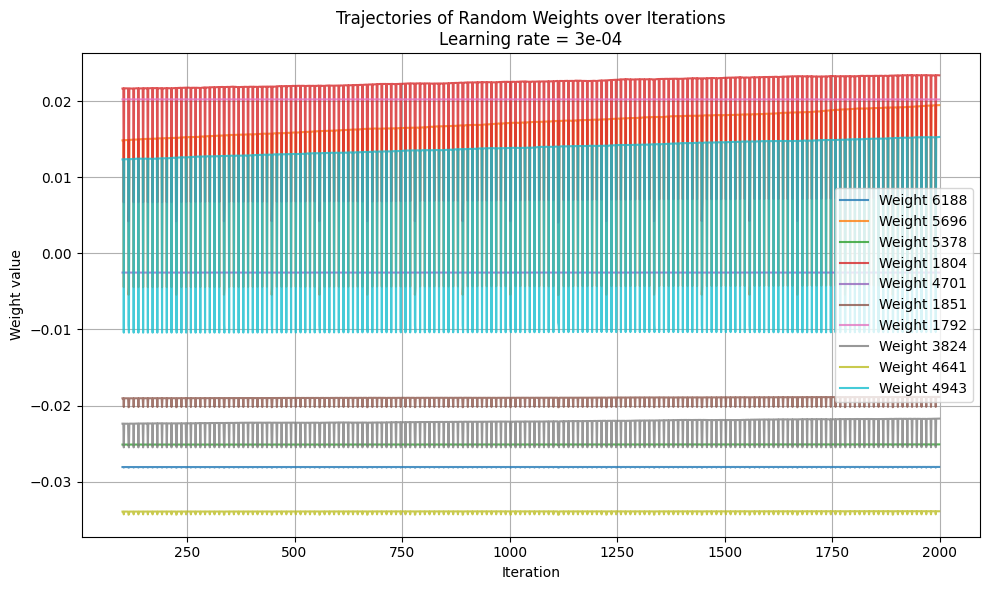

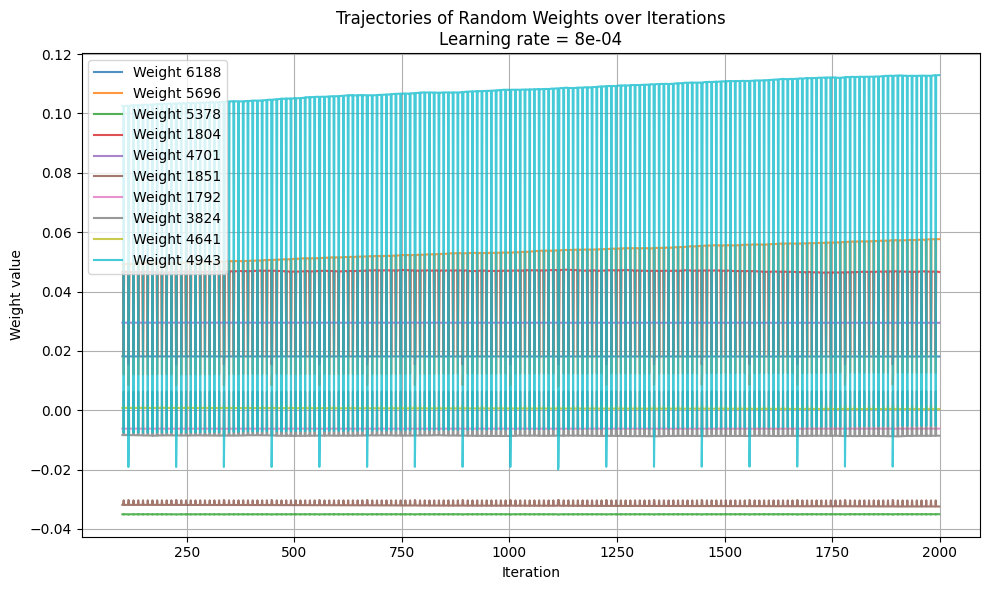

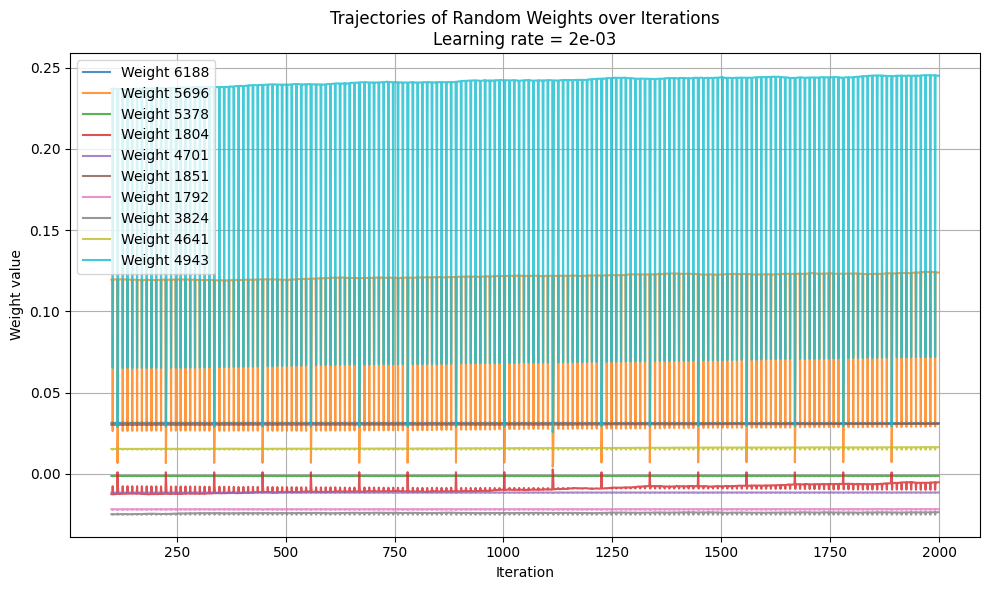

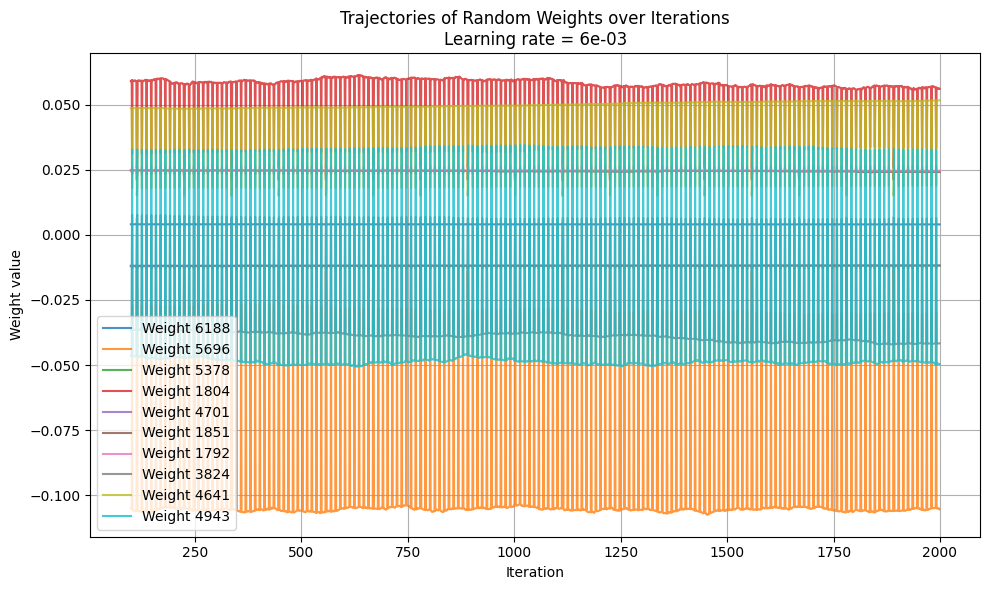

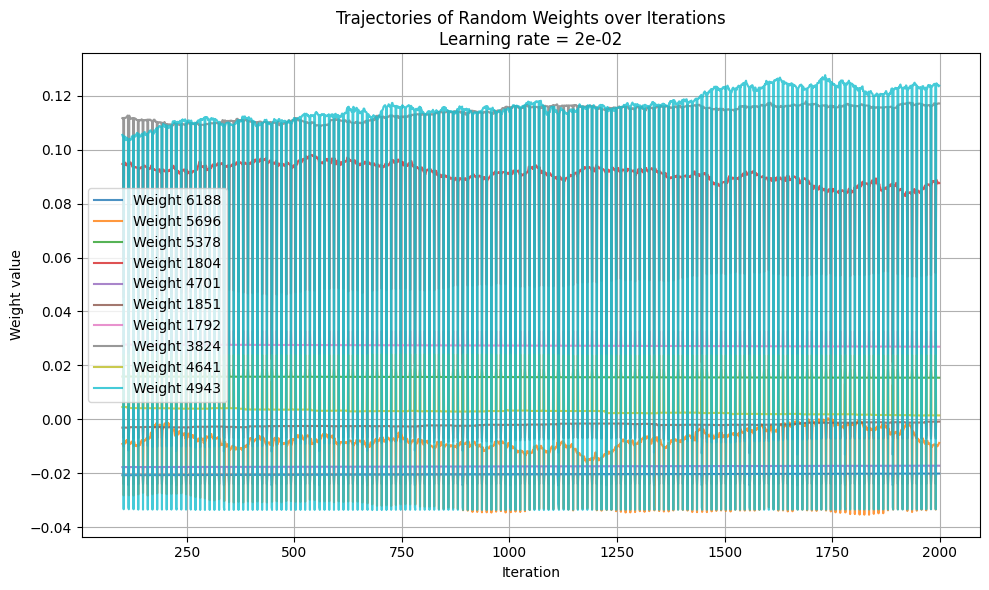

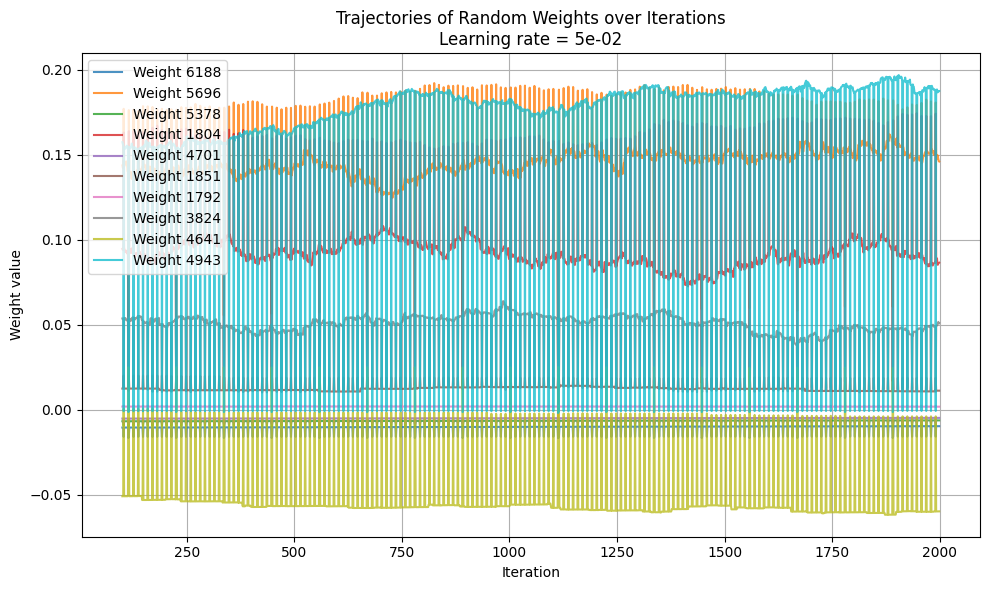

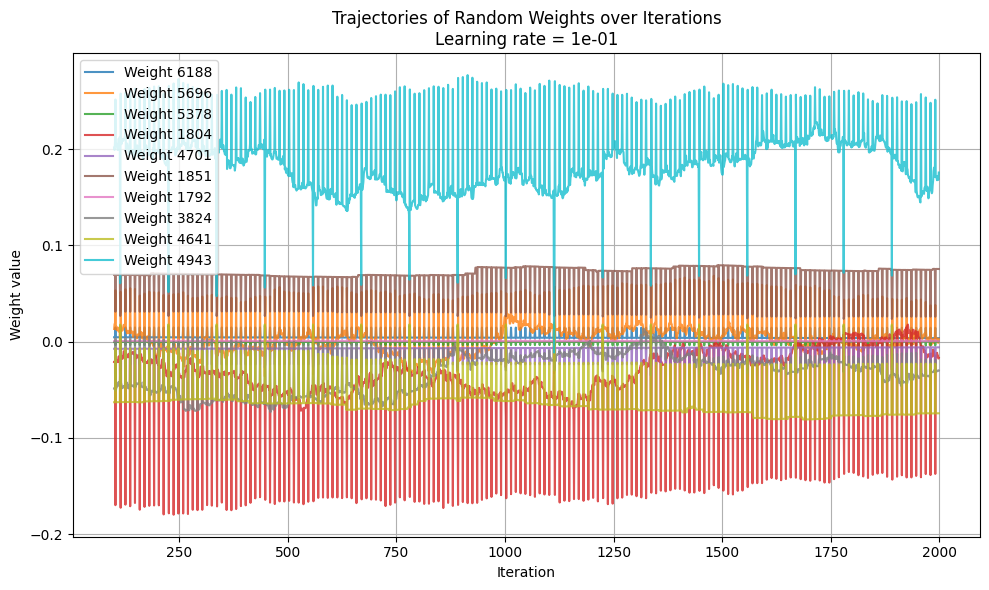

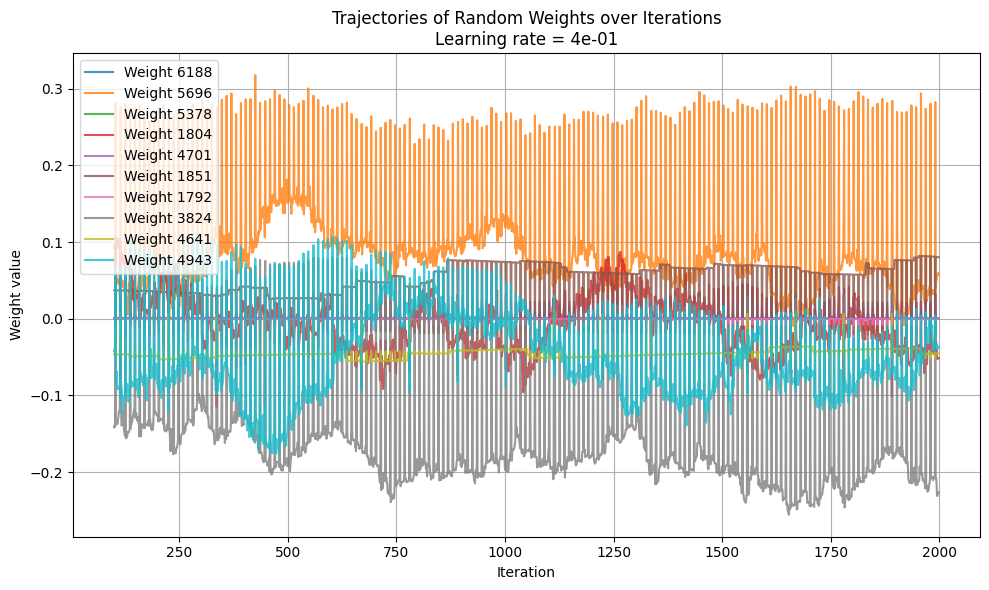

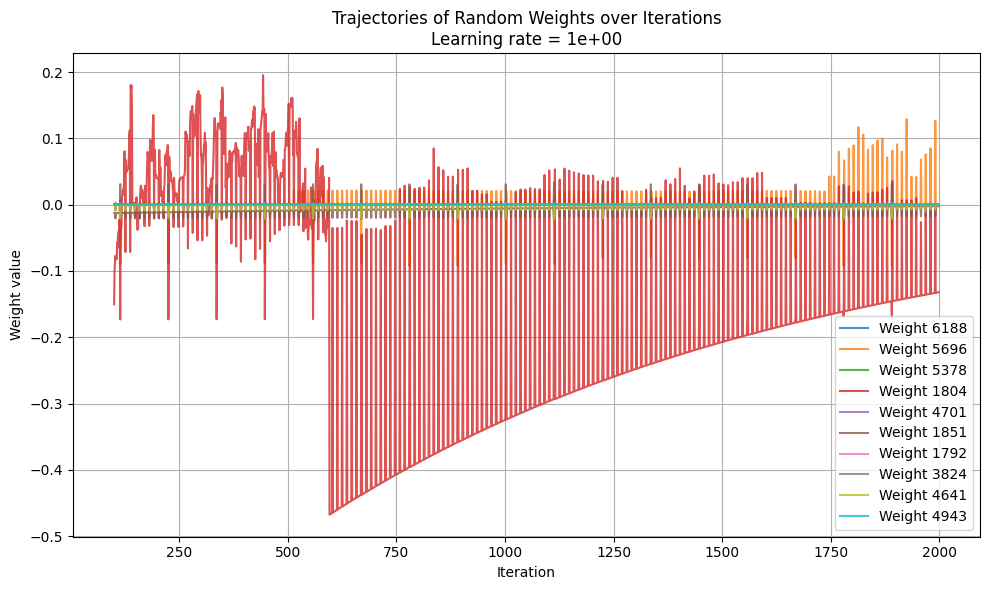

In [39]:
visualise(100, 2000)

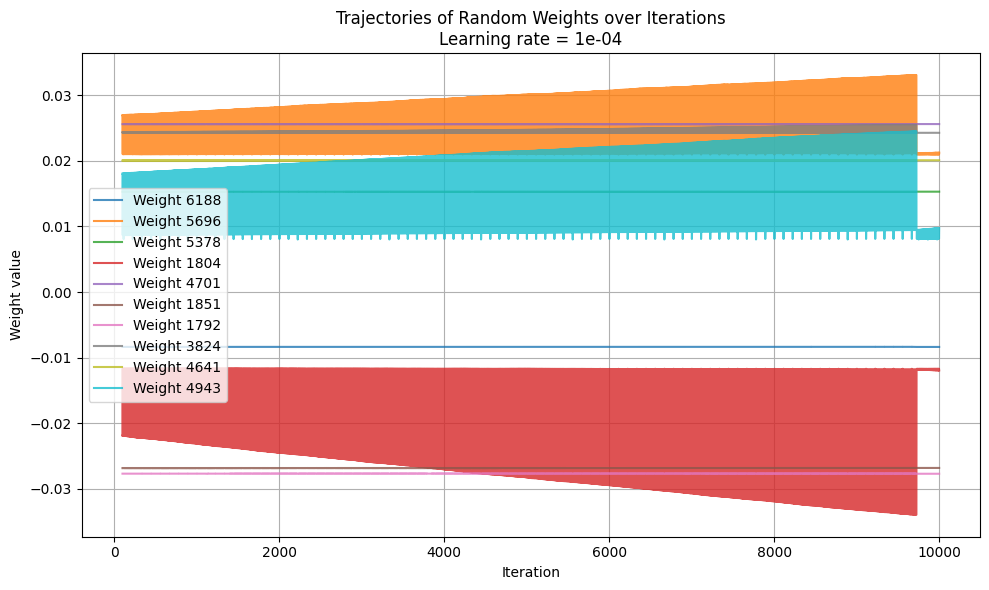

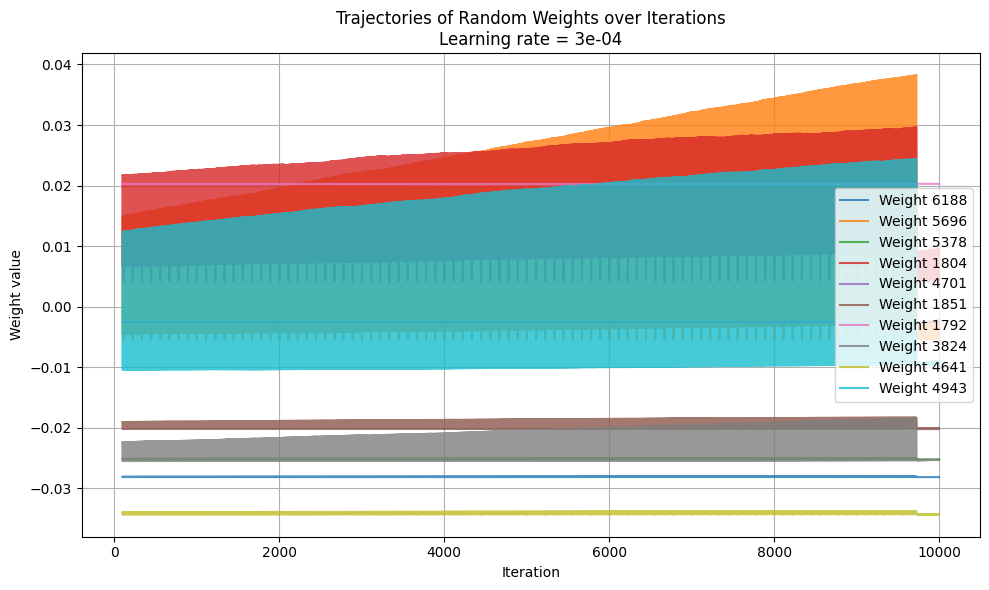

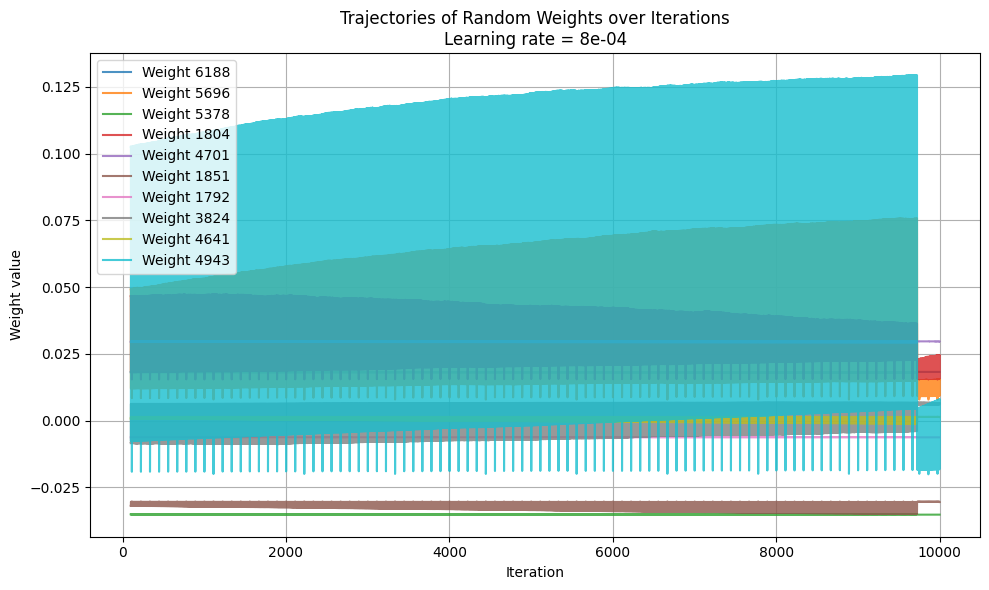

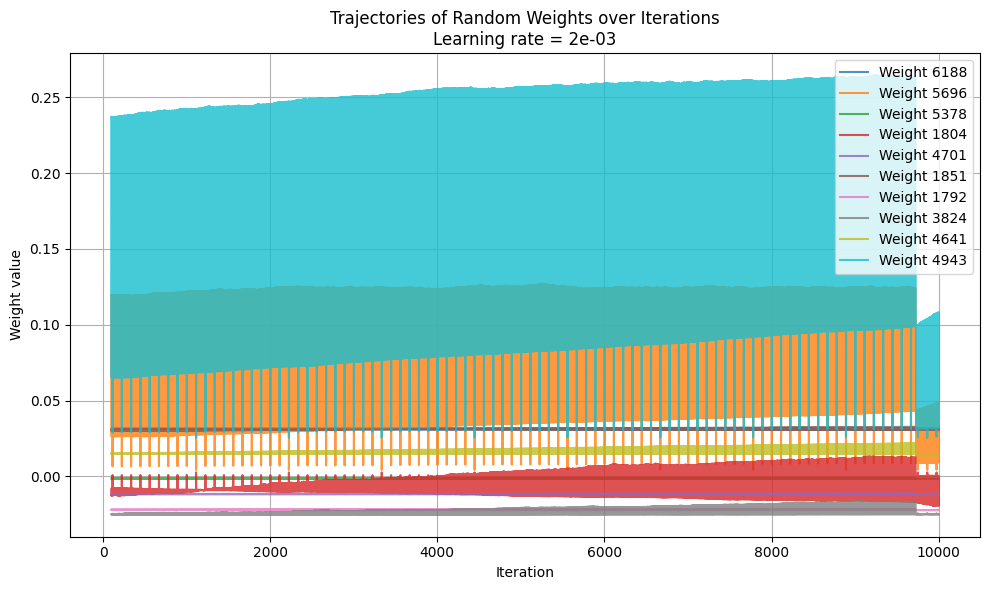

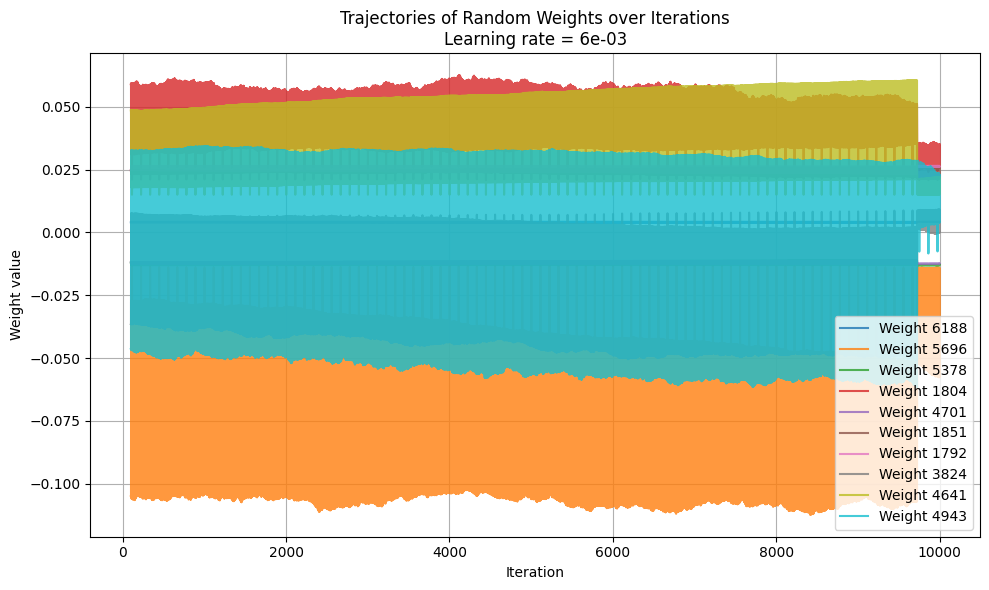

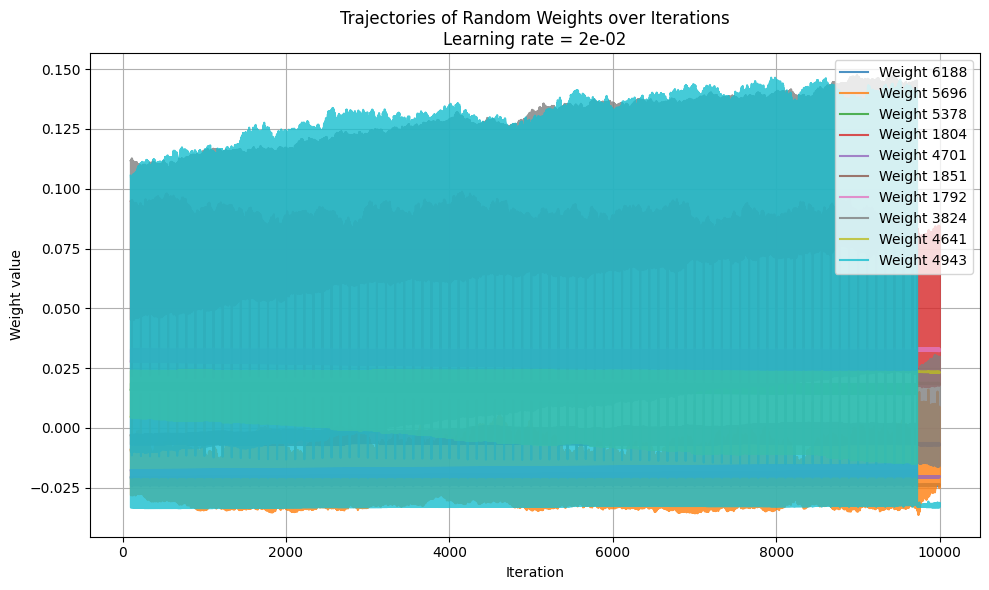

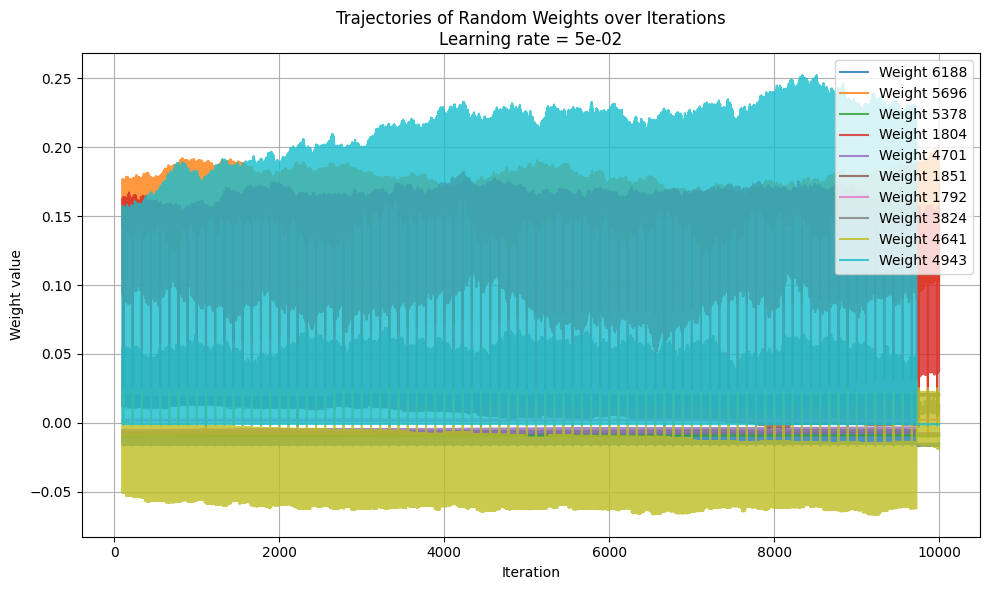

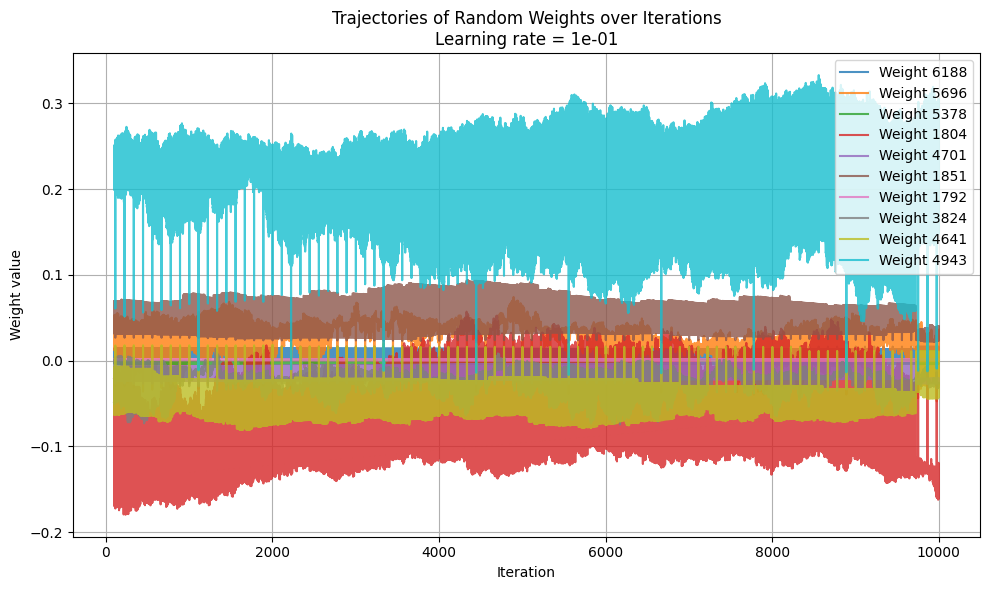

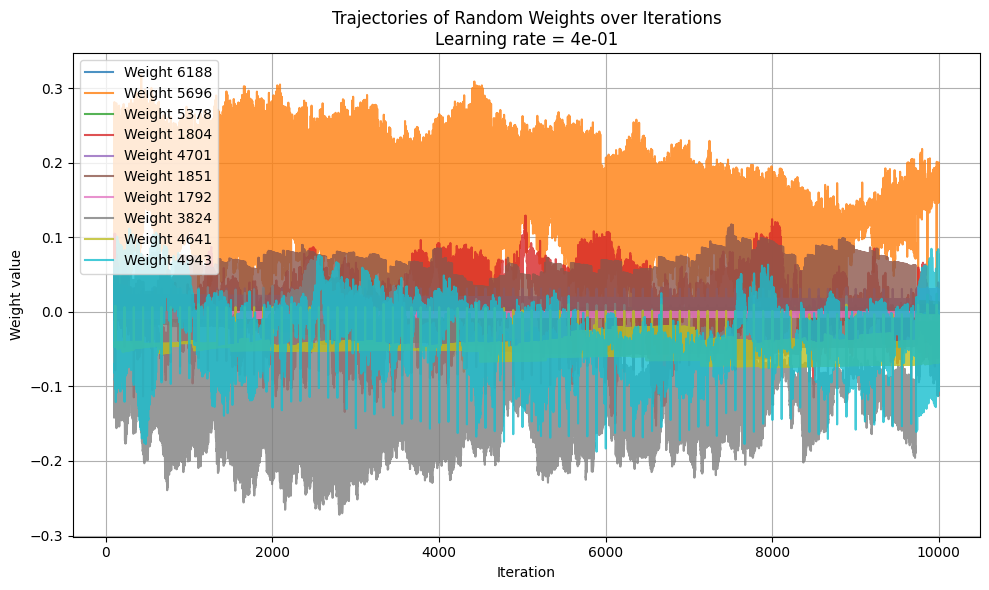

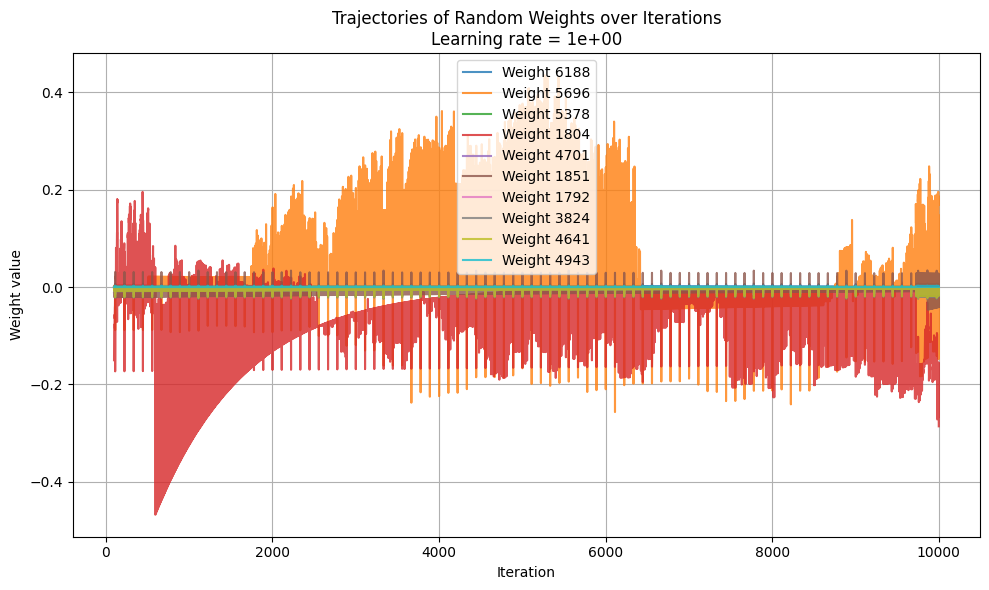

In [40]:
visualise(100, 10000)